In [2]:
from matplotlib import pyplot as plt

from environment import CliffBoxPushingBase
from collections import defaultdict
import numpy as np
import random
import time
import os


In [3]:
class QAgent(object):
    def __init__(self):
        self.action_space = [1, 2, 3, 4]
        self.V = []
        self.Q = defaultdict(lambda: np.zeros(len(self.action_space)))
        self.discount_factor = 0.99
        self.alpha = 0.5
        self.epsilon = 0.01

    def take_action(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.action_space)
        else:
            action = self.action_space[np.argmax(self.Q[state])]
        return action

    # implement your train/update function to update self.V or self.Q
    # you should pass arguments to the train function
    def train(self, state, action, next_state, reward):
        # Update The Q-Value
        # print(type(state))
        action -= 1
        self.Q[state][action] = self.Q[state][action] * (1 - self.alpha) + \
                                 self.alpha * (reward + self.discount_factor * np.max(self.Q[next_state]))

        # Transition To The Next State
        # self.state = next_state
        # self.V += reward
        # pass


In [4]:
def drawDiagram(path, x, y):
    if not os.path.isdir(path):
        os.mkdir(path)

    plt.figure()
    x = list(range(x))

    plt.plot(x, y)
    plt.xlabel("Episodes")
    plt.ylabel("Episode rewards")
    plt.title("Episode rewards change as episode goes on!")
    print("saving learning curve...")
    plt.show()
    plt.savefig(os.path.join(path, 'reward.png'))

In [5]:
env = CliffBoxPushingBase()
# you can implement other algorithms
agent = QAgent()
print(agent.Q)
teminated = False
rewards = []
time_step = 0
num_iterations = 10000
rewards_all_episodes = []
for i in range(num_iterations):
    env.reset()
    while not teminated:
        state = env.get_state()
        action = agent.take_action(state)
        # print(action)
        reward, teminated, _ = env.step([action])
        next_state = env.get_state()
        rewards.append(reward)
        time_step += 1
        agent.train(state, action, next_state, reward)
        if i % 100 == 0:
            print('i:', i)
            print(f'step: {time_step-1}, actions: {action}, reward: {reward}')
            print(f'rewards: {sum(rewards)}')
            print(f'print the historical actions: {env.episode_actions}')
    teminated = False
    rewards_current_episode = sum(rewards)
    rewards_all_episodes.append(rewards_current_episode)
    rewards = []

defaultdict(<function QAgent.__init__.<locals>.<lambda> at 0x7fcdc95a8af0>, {})
i: 0
step: 0, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 0
step: 1, actions: 1, reward: -15
rewards: -29
print the historical actions: [[1], [1]]
i: 0
step: 2, actions: 1, reward: -16
rewards: -45
print the historical actions: [[1], [1], [1]]
i: 0
step: 3, actions: 1, reward: -17
rewards: -62
print the historical actions: [[1], [1], [1], [1]]
i: 0
step: 4, actions: 1, reward: -18
rewards: -80
print the historical actions: [[1], [1], [1], [1], [1]]
i: 0
step: 5, actions: 1, reward: -18
rewards: -98
print the historical actions: [[1], [1], [1], [1], [1], [1]]
i: 0
step: 6, actions: 2, reward: -17
rewards: -115
print the historical actions: [[1], [1], [1], [1], [1], [1], [2]]
i: 0
step: 7, actions: 2, reward: -16
rewards: -131
print the historical actions: [[1], [1], [1], [1], [1], [1], [2], [2]]
i: 0
step: 8, actions: 2, reward: -15
rewards: -146
print the historical actions: 

i: 100
step: 4716, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 100
step: 4717, actions: 4, reward: -15
rewards: -29
print the historical actions: [[4], [4]]
i: 100
step: 4718, actions: 3, reward: -14
rewards: -43
print the historical actions: [[4], [4], [3]]
i: 100
step: 4719, actions: 1, reward: -15
rewards: -58
print the historical actions: [[4], [4], [3], [1]]
i: 100
step: 4720, actions: 2, reward: -16
rewards: -74
print the historical actions: [[4], [4], [3], [1], [2]]
i: 100
step: 4721, actions: 3, reward: -17
rewards: -91
print the historical actions: [[4], [4], [3], [1], [2], [3]]
i: 100
step: 4722, actions: 1, reward: -16
rewards: -107
print the historical actions: [[4], [4], [3], [1], [2], [3], [1]]
i: 100
step: 4723, actions: 1, reward: -15
rewards: -122
print the historical actions: [[4], [4], [3], [1], [2], [3], [1], [1]]
i: 100
step: 4724, actions: 1, reward: -16
rewards: -138
print the historical actions: [[4], [4], [3], [1], [2], [3], [1],

i: 300
step: 17592, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 300
step: 17593, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 300
step: 17594, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 300
step: 17595, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 300
step: 17596, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 300
step: 17597, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 300
step: 17598, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 300
step: 17599, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 300
step: 17600, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1], [1], [1], [3], 

i: 500
step: 30553, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 500
step: 30554, actions: 4, reward: -15
rewards: -29
print the historical actions: [[4], [4]]
i: 500
step: 30555, actions: 1, reward: -14
rewards: -43
print the historical actions: [[4], [4], [1]]
i: 500
step: 30556, actions: 3, reward: -14
rewards: -57
print the historical actions: [[4], [4], [1], [3]]
i: 500
step: 30557, actions: 1, reward: -15
rewards: -72
print the historical actions: [[4], [4], [1], [3], [1]]
i: 500
step: 30558, actions: 1, reward: -16
rewards: -88
print the historical actions: [[4], [4], [1], [3], [1], [1]]
i: 500
step: 30559, actions: 2, reward: -15
rewards: -103
print the historical actions: [[4], [4], [1], [3], [1], [1], [2]]
i: 500
step: 30560, actions: 2, reward: -14
rewards: -117
print the historical actions: [[4], [4], [1], [3], [1], [1], [2], [2]]
i: 500
step: 30561, actions: 3, reward: -14
rewards: -131
print the historical actions: [[4], [4], [1], [3], [1], 

i: 600
step: 37604, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 600
step: 37605, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 600
step: 37606, actions: 4, reward: -16
rewards: -45
print the historical actions: [[4], [1], [4]]
i: 600
step: 37607, actions: 3, reward: -15
rewards: -60
print the historical actions: [[4], [1], [4], [3]]
i: 600
step: 37608, actions: 1, reward: -16
rewards: -76
print the historical actions: [[4], [1], [4], [3], [1]]
i: 600
step: 37609, actions: 1, reward: -17
rewards: -93
print the historical actions: [[4], [1], [4], [3], [1], [1]]
i: 600
step: 37610, actions: 3, reward: -18
rewards: -111
print the historical actions: [[4], [1], [4], [3], [1], [1], [3]]
i: 600
step: 37611, actions: 1, reward: -17
rewards: -128
print the historical actions: [[4], [1], [4], [3], [1], [1], [3], [1]]
i: 600
step: 37612, actions: 4, reward: -16
rewards: -144
print the historical actions: [[4], [1], [4], [3], [1], 

i: 700
step: 44483, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 700
step: 44484, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 700
step: 44485, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 700
step: 44486, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 700
step: 44487, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 700
step: 44488, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 700
step: 44489, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 700
step: 44490, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 700
step: 44491, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1], [1], [1], [3], 

i: 800
step: 51186, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 800
step: 51187, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 800
step: 51188, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 800
step: 51189, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 800
step: 51190, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 800
step: 51191, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 800
step: 51192, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 800
step: 51193, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 800
step: 51194, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1], [1], [1], [3], 

i: 1000
step: 64635, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 1000
step: 64636, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 1000
step: 64637, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 1000
step: 64638, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 1000
step: 64639, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 1000
step: 64640, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 1000
step: 64641, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 1000
step: 64642, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 1000
step: 64643, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1], [1], [

i: 1100
step: 70910, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 1100
step: 70911, actions: 1, reward: -15
rewards: -29
print the historical actions: [[1], [1]]
i: 1100
step: 70912, actions: 3, reward: -15
rewards: -44
print the historical actions: [[1], [1], [3]]
i: 1100
step: 70913, actions: 4, reward: -14
rewards: -58
print the historical actions: [[1], [1], [3], [4]]
i: 1100
step: 70914, actions: 2, reward: -14
rewards: -72
print the historical actions: [[1], [1], [3], [4], [2]]
i: 1100
step: 70915, actions: 4, reward: -15
rewards: -87
print the historical actions: [[1], [1], [3], [4], [2], [4]]
i: 1100
step: 70916, actions: 3, reward: -14
rewards: -101
print the historical actions: [[1], [1], [3], [4], [2], [4], [3]]
i: 1100
step: 70917, actions: 1, reward: -15
rewards: -116
print the historical actions: [[1], [1], [3], [4], [2], [4], [3], [1]]
i: 1100
step: 70918, actions: 1, reward: -16
rewards: -132
print the historical actions: [[1], [1], [3], [

i: 1200
step: 77956, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 1200
step: 77957, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 1200
step: 77958, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 1200
step: 77959, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 1200
step: 77960, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 1200
step: 77961, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 1200
step: 77962, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 1200
step: 77963, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 1200
step: 77964, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1], [1], [

i: 1400
step: 91657, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 1400
step: 91658, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 1400
step: 91659, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 1400
step: 91660, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 1400
step: 91661, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 1400
step: 91662, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 1400
step: 91663, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 1400
step: 91664, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 1400
step: 91665, actions: 2, reward: -16
rewards: -144
print the historical actions: [[4], [1], [1], [

i: 1500
step: 98937, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 1500
step: 98938, actions: 4, reward: -15
rewards: -29
print the historical actions: [[4], [4]]
i: 1500
step: 98939, actions: 1, reward: -14
rewards: -43
print the historical actions: [[4], [4], [1]]
i: 1500
step: 98940, actions: 3, reward: -14
rewards: -57
print the historical actions: [[4], [4], [1], [3]]
i: 1500
step: 98941, actions: 2, reward: -15
rewards: -72
print the historical actions: [[4], [4], [1], [3], [2]]
i: 1500
step: 98942, actions: 2, reward: -15
rewards: -87
print the historical actions: [[4], [4], [1], [3], [2], [2]]
i: 1500
step: 98943, actions: 1, reward: -14
rewards: -101
print the historical actions: [[4], [4], [1], [3], [2], [2], [1]]
i: 1500
step: 98944, actions: 1, reward: -15
rewards: -116
print the historical actions: [[4], [4], [1], [3], [2], [2], [1], [1]]
i: 1500
step: 98945, actions: 1, reward: -16
rewards: -132
print the historical actions: [[4], [4], [1], [

i: 1600
step: 106565, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 1600
step: 106566, actions: 1, reward: -15
rewards: -29
print the historical actions: [[1], [1]]
i: 1600
step: 106567, actions: 3, reward: -15
rewards: -44
print the historical actions: [[1], [1], [3]]
i: 1600
step: 106568, actions: 2, reward: -14
rewards: -58
print the historical actions: [[1], [1], [3], [2]]
i: 1600
step: 106569, actions: 4, reward: -13
rewards: -71
print the historical actions: [[1], [1], [3], [2], [4]]
i: 1600
step: 106570, actions: 2, reward: -14
rewards: -85
print the historical actions: [[1], [1], [3], [2], [4], [2]]
i: 1600
step: 106571, actions: 4, reward: -13
rewards: -98
print the historical actions: [[1], [1], [3], [2], [4], [2], [4]]
i: 1600
step: 106572, actions: 3, reward: -14
rewards: -112
print the historical actions: [[1], [1], [3], [2], [4], [2], [4], [3]]
i: 1600
step: 106573, actions: 3, reward: -15
rewards: -127
print the historical actions: [[1], [1]

i: 1700
step: 114718, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 1700
step: 114719, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 1700
step: 114720, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 1700
step: 114721, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 1700
step: 114722, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 1700
step: 114723, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 1700
step: 114724, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 1700
step: 114725, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 1700
step: 114726, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 1800
step: 123059, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 1800
step: 123060, actions: 4, reward: -13
rewards: -27
print the historical actions: [[1], [4]]
i: 1800
step: 123061, actions: 2, reward: -14
rewards: -41
print the historical actions: [[1], [4], [2]]
i: 1800
step: 123062, actions: 4, reward: -13
rewards: -54
print the historical actions: [[1], [4], [2], [4]]
i: 1800
step: 123063, actions: 1, reward: -14
rewards: -68
print the historical actions: [[1], [4], [2], [4], [1]]
i: 1800
step: 123064, actions: 1, reward: -15
rewards: -83
print the historical actions: [[1], [4], [2], [4], [1], [1]]
i: 1800
step: 123065, actions: 1, reward: -16
rewards: -99
print the historical actions: [[1], [4], [2], [4], [1], [1], [1]]
i: 1800
step: 123066, actions: 2, reward: -17
rewards: -116
print the historical actions: [[1], [4], [2], [4], [1], [1], [1], [2]]
i: 1800
step: 123067, actions: 4, reward: -1018
rewards: -1134
print the historical actions: [[1], 

i: 2000
step: 140163, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2000
step: 140164, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2000
step: 140165, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2000
step: 140166, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2000
step: 140167, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2000
step: 140168, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2000
step: 140169, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2000
step: 140170, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2000
step: 140171, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 2100
step: 148896, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2100
step: 148897, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2100
step: 148898, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2100
step: 148899, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2100
step: 148900, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2100
step: 148901, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2100
step: 148902, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2100
step: 148903, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2100
step: 148904, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 2200
step: 157448, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2200
step: 157449, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2200
step: 157450, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2200
step: 157451, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2200
step: 157452, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2200
step: 157453, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2200
step: 157454, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2200
step: 157455, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2200
step: 157456, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 2300
step: 165792, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2300
step: 165793, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2300
step: 165794, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2300
step: 165795, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2300
step: 165796, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2300
step: 165797, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2300
step: 165798, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2300
step: 165799, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2300
step: 165800, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 2400
step: 172780, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2400
step: 172781, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2400
step: 172782, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2400
step: 172783, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2400
step: 172784, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2400
step: 172785, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2400
step: 172786, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2400
step: 172787, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2400
step: 172788, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 2600
step: 181492, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2600
step: 181493, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2600
step: 181494, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2600
step: 181495, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2600
step: 181496, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2600
step: 181497, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2600
step: 181498, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2600
step: 181499, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2600
step: 181500, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 2800
step: 190512, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 2800
step: 190513, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 2800
step: 190514, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 2800
step: 190515, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 2800
step: 190516, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 2800
step: 190517, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 2800
step: 190518, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 2800
step: 190519, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 2800
step: 190520, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 3000
step: 198973, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 3000
step: 198974, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 3000
step: 198975, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 3000
step: 198976, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 3000
step: 198977, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 3000
step: 198978, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 3000
step: 198979, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 3000
step: 198980, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 3000
step: 198981, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 3200
step: 207658, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 3200
step: 207659, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 3200
step: 207660, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 3200
step: 207661, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 3200
step: 207662, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 3200
step: 207663, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 3200
step: 207664, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 3200
step: 207665, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 3200
step: 207666, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 3400
step: 216271, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 3400
step: 216272, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 3400
step: 216273, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 3400
step: 216274, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 3400
step: 216275, actions: 4, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [4]]
i: 3400
step: 216276, actions: 2, reward: -19
rewards: -99
print the historical actions: [[4], [1], [1], [1], [4], [2]]
i: 3400
step: 216277, actions: 1, reward: -18
rewards: -117
print the historical actions: [[4], [1], [1], [1], [4], [2], [1]]
i: 3400
step: 216278, actions: 1, reward: -17
rewards: -134
print the historical actions: [[4], [1], [1], [1], [4], [2], [1], [1]]
i: 3400
step: 216279, actions: 1, reward: -18
rewards: -152
print the historical actions: [[4], [1

i: 3500
step: 220391, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 3500
step: 220392, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 3500
step: 220393, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 3500
step: 220394, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 3500
step: 220395, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 3500
step: 220396, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 3500
step: 220397, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 3500
step: 220398, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 3500
step: 220399, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 3600
step: 224660, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 3600
step: 224661, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 3600
step: 224662, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 3600
step: 224663, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 3600
step: 224664, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 3600
step: 224665, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 3600
step: 224666, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 3600
step: 224667, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 3600
step: 224668, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 3800
step: 233445, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 3800
step: 233446, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 3800
step: 233447, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 3800
step: 233448, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 3800
step: 233449, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 3800
step: 233450, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 3800
step: 233451, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 3800
step: 233452, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 3800
step: 233453, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 4000
step: 242098, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 4000
step: 242099, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 4000
step: 242100, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 4000
step: 242101, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 4000
step: 242102, actions: 2, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [2]]
i: 4000
step: 242103, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [2], [1]]
i: 4000
step: 242104, actions: 3, reward: -18
rewards: -115
print the historical actions: [[4], [1], [1], [1], [2], [1], [3]]
i: 4000
step: 242105, actions: 1, reward: -17
rewards: -132
print the historical actions: [[4], [1], [1], [1], [2], [1], [3], [1]]
i: 4000
step: 242106, actions: 4, reward: -16
rewards: -148
print the historical actions: [[4], [1

i: 4100
step: 246313, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 4100
step: 246314, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 4100
step: 246315, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 4100
step: 246316, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 4100
step: 246317, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 4100
step: 246318, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 4100
step: 246319, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 4100
step: 246320, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 4100
step: 246321, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 4300
step: 254872, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 4300
step: 254873, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 4300
step: 254874, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 4300
step: 254875, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 4300
step: 254876, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 4300
step: 254877, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 4300
step: 254878, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 4300
step: 254879, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 4300
step: 254880, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 4500
step: 263235, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 4500
step: 263236, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 4500
step: 263237, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 4500
step: 263238, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 4500
step: 263239, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 4500
step: 263240, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 4500
step: 263241, actions: 2, reward: -18
rewards: -115
print the historical actions: [[4], [1], [1], [1], [3], [1], [2]]
i: 4500
step: 263242, actions: 1, reward: -17
rewards: -132
print the historical actions: [[4], [1], [1], [1], [3], [1], [2], [1]]
i: 4500
step: 263243, actions: 4, reward: -16
rewards: -148
print the historical actions: [[4], [1

i: 4600
step: 267378, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 4600
step: 267379, actions: 4, reward: -13
rewards: -27
print the historical actions: [[1], [4]]
i: 4600
step: 267380, actions: 2, reward: -14
rewards: -41
print the historical actions: [[1], [4], [2]]
i: 4600
step: 267381, actions: 1, reward: -13
rewards: -54
print the historical actions: [[1], [4], [2], [1]]
i: 4600
step: 267382, actions: 2, reward: -14
rewards: -68
print the historical actions: [[1], [4], [2], [1], [2]]
i: 4600
step: 267383, actions: 4, reward: -13
rewards: -81
print the historical actions: [[1], [4], [2], [1], [2], [4]]
i: 4600
step: 267384, actions: 1, reward: -14
rewards: -95
print the historical actions: [[1], [4], [2], [1], [2], [4], [1]]
i: 4600
step: 267385, actions: 3, reward: -15
rewards: -110
print the historical actions: [[1], [4], [2], [1], [2], [4], [1], [3]]
i: 4600
step: 267386, actions: 4, reward: -14
rewards: -124
print the historical actions: [[1], [4]

i: 4700
step: 271580, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 4700
step: 271581, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 4700
step: 271582, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 4700
step: 271583, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 4700
step: 271584, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 4700
step: 271585, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 4700
step: 271586, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 4700
step: 271587, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 4700
step: 271588, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 4900
step: 279868, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 4900
step: 279869, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 4900
step: 279870, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 4900
step: 279871, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 4900
step: 279872, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 4900
step: 279873, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 4900
step: 279874, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 4900
step: 279875, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 4900
step: 279876, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 5000
step: 284267, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 5000
step: 284268, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 5000
step: 284269, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 5000
step: 284270, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 5000
step: 284271, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 5000
step: 284272, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 5000
step: 284273, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 5000
step: 284274, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 5000
step: 284275, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 5100
step: 288440, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 5100
step: 288441, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 5100
step: 288442, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 5100
step: 288443, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 5100
step: 288444, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 5100
step: 288445, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 5100
step: 288446, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 5100
step: 288447, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 5100
step: 288448, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 5300
step: 296937, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 5300
step: 296938, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 5300
step: 296939, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 5300
step: 296940, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 5300
step: 296941, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 5300
step: 296942, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 5300
step: 296943, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 5300
step: 296944, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 5300
step: 296945, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 5400
step: 301026, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 5400
step: 301027, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 5400
step: 301028, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 5400
step: 301029, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 5400
step: 301030, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 5400
step: 301031, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 5400
step: 301032, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 5400
step: 301033, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 5400
step: 301034, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 5600
step: 309413, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 5600
step: 309414, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 5600
step: 309415, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 5600
step: 309416, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 5600
step: 309417, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 5600
step: 309418, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 5600
step: 309419, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 5600
step: 309420, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 5600
step: 309421, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 5800
step: 317921, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 5800
step: 317922, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 5800
step: 317923, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 5800
step: 317924, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 5800
step: 317925, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 5800
step: 317926, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 5800
step: 317927, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 5800
step: 317928, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 5800
step: 317929, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 6000
step: 326249, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 6000
step: 326250, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 6000
step: 326251, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 6000
step: 326252, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 6000
step: 326253, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 6000
step: 326254, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 6000
step: 326255, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 6000
step: 326256, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 6000
step: 326257, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 6200
step: 334543, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 6200
step: 334544, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 6200
step: 334545, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 6200
step: 334546, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 6200
step: 334547, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 6200
step: 334548, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 6200
step: 334549, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 6200
step: 334550, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 6200
step: 334551, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 6400
step: 342814, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 6400
step: 342815, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 6400
step: 342816, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 6400
step: 342817, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 6400
step: 342818, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 6400
step: 342819, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 6400
step: 342820, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 6400
step: 342821, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 6400
step: 342822, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 6600
step: 351026, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 6600
step: 351027, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 6600
step: 351028, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 6600
step: 351029, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 6600
step: 351030, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 6600
step: 351031, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 6600
step: 351032, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 6600
step: 351033, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 6600
step: 351034, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 6800
step: 359291, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 6800
step: 359292, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 6800
step: 359293, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 6800
step: 359294, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 6800
step: 359295, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 6800
step: 359296, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 6800
step: 359297, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 6800
step: 359298, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 6800
step: 359299, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 7000
step: 367494, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 7000
step: 367495, actions: 4, reward: -13
rewards: -27
print the historical actions: [[1], [4]]
i: 7000
step: 367496, actions: 2, reward: -14
rewards: -41
print the historical actions: [[1], [4], [2]]
i: 7000
step: 367497, actions: 4, reward: -13
rewards: -54
print the historical actions: [[1], [4], [2], [4]]
i: 7000
step: 367498, actions: 1, reward: -14
rewards: -68
print the historical actions: [[1], [4], [2], [4], [1]]
i: 7000
step: 367499, actions: 1, reward: -15
rewards: -83
print the historical actions: [[1], [4], [2], [4], [1], [1]]
i: 7000
step: 367500, actions: 1, reward: -16
rewards: -99
print the historical actions: [[1], [4], [2], [4], [1], [1], [1]]
i: 7000
step: 367501, actions: 3, reward: -17
rewards: -116
print the historical actions: [[1], [4], [2], [4], [1], [1], [1], [3]]
i: 7000
step: 367502, actions: 1, reward: -16
rewards: -132
print the historical actions: [[1], [4]

i: 7100
step: 371604, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 7100
step: 371605, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 7100
step: 371606, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 7100
step: 371607, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 7100
step: 371608, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 7100
step: 371609, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 7100
step: 371610, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 7100
step: 371611, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 7100
step: 371612, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 7300
step: 379825, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 7300
step: 379826, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 7300
step: 379827, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 7300
step: 379828, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 7300
step: 379829, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 7300
step: 379830, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 7300
step: 379831, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 7300
step: 379832, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 7300
step: 379833, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 7400
step: 384002, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 7400
step: 384003, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 7400
step: 384004, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 7400
step: 384005, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 7400
step: 384006, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 7400
step: 384007, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 7400
step: 384008, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 7400
step: 384009, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 7400
step: 384010, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 7600
step: 392107, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 7600
step: 392108, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 7600
step: 392109, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 7600
step: 392110, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 7600
step: 392111, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 7600
step: 392112, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 7600
step: 392113, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 7600
step: 392114, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 7600
step: 392115, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 7800
step: 400325, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 7800
step: 400326, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 7800
step: 400327, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 7800
step: 400328, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 7800
step: 400329, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 7800
step: 400330, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 7800
step: 400331, actions: 2, reward: -18
rewards: -115
print the historical actions: [[4], [1], [1], [1], [3], [1], [2]]
i: 7800
step: 400332, actions: 1, reward: -17
rewards: -132
print the historical actions: [[4], [1], [1], [1], [3], [1], [2], [1]]
i: 7800
step: 400333, actions: 4, reward: -16
rewards: -148
print the historical actions: [[4], [1

i: 7900
step: 404419, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 7900
step: 404420, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 7900
step: 404421, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 7900
step: 404422, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 7900
step: 404423, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 7900
step: 404424, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 7900
step: 404425, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 7900
step: 404426, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 7900
step: 404427, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 8100
step: 412486, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 8100
step: 412487, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 8100
step: 412488, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 8100
step: 412489, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 8100
step: 412490, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 8100
step: 412491, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 8100
step: 412492, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 8100
step: 412493, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 8100
step: 412494, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 8300
step: 420671, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 8300
step: 420672, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 8300
step: 420673, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 8300
step: 420674, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 8300
step: 420675, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 8300
step: 420676, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 8300
step: 420677, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 8300
step: 420678, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 8300
step: 420679, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 8400
step: 424758, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 8400
step: 424759, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 8400
step: 424760, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 8400
step: 424761, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 8400
step: 424762, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 8400
step: 424763, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 8400
step: 424764, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 8400
step: 424765, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 8400
step: 424766, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 8600
step: 432839, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 8600
step: 432840, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 8600
step: 432841, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 8600
step: 432842, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 8600
step: 432843, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 8600
step: 432844, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 8600
step: 432845, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 8600
step: 432846, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 8600
step: 432847, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 8800
step: 441047, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 8800
step: 441048, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 8800
step: 441049, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 8800
step: 441050, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 8800
step: 441051, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 8800
step: 441052, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 8800
step: 441053, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 8800
step: 441054, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 8800
step: 441055, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 9000
step: 449186, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 9000
step: 449187, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 9000
step: 449188, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 9000
step: 449189, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 9000
step: 449190, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 9000
step: 449191, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 9000
step: 449192, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 9000
step: 449193, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 9000
step: 449194, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 9200
step: 457334, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 9200
step: 457335, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 9200
step: 457336, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 9200
step: 457337, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 9200
step: 457338, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 9200
step: 457339, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 9200
step: 457340, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 9200
step: 457341, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 9200
step: 457342, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 9400
step: 465671, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 9400
step: 465672, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 9400
step: 465673, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 9400
step: 465674, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 9400
step: 465675, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 9400
step: 465676, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 9400
step: 465677, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 9400
step: 465678, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 9400
step: 465679, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 9500
step: 469808, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 9500
step: 469809, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 9500
step: 469810, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 9500
step: 469811, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 9500
step: 469812, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 9500
step: 469813, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 9500
step: 469814, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 9500
step: 469815, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 9500
step: 469816, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 9700
step: 477848, actions: 1, reward: -14
rewards: -14
print the historical actions: [[1]]
i: 9700
step: 477849, actions: 4, reward: -13
rewards: -27
print the historical actions: [[1], [4]]
i: 9700
step: 477850, actions: 2, reward: -14
rewards: -41
print the historical actions: [[1], [4], [2]]
i: 9700
step: 477851, actions: 4, reward: -13
rewards: -54
print the historical actions: [[1], [4], [2], [4]]
i: 9700
step: 477852, actions: 1, reward: -14
rewards: -68
print the historical actions: [[1], [4], [2], [4], [1]]
i: 9700
step: 477853, actions: 1, reward: -15
rewards: -83
print the historical actions: [[1], [4], [2], [4], [1], [1]]
i: 9700
step: 477854, actions: 1, reward: -16
rewards: -99
print the historical actions: [[1], [4], [2], [4], [1], [1], [1]]
i: 9700
step: 477855, actions: 3, reward: -17
rewards: -116
print the historical actions: [[1], [4], [2], [4], [1], [1], [1], [3]]
i: 9700
step: 477856, actions: 1, reward: -16
rewards: -132
print the historical actions: [[1], [4]

i: 9800
step: 482028, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 9800
step: 482029, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 9800
step: 482030, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 9800
step: 482031, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 9800
step: 482032, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 9800
step: 482033, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 9800
step: 482034, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 9800
step: 482035, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 9800
step: 482036, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

i: 9900
step: 486072, actions: 4, reward: -14
rewards: -14
print the historical actions: [[4]]
i: 9900
step: 486073, actions: 1, reward: -15
rewards: -29
print the historical actions: [[4], [1]]
i: 9900
step: 486074, actions: 1, reward: -16
rewards: -45
print the historical actions: [[4], [1], [1]]
i: 9900
step: 486075, actions: 1, reward: -17
rewards: -62
print the historical actions: [[4], [1], [1], [1]]
i: 9900
step: 486076, actions: 3, reward: -18
rewards: -80
print the historical actions: [[4], [1], [1], [1], [3]]
i: 9900
step: 486077, actions: 1, reward: -17
rewards: -97
print the historical actions: [[4], [1], [1], [1], [3], [1]]
i: 9900
step: 486078, actions: 4, reward: -16
rewards: -113
print the historical actions: [[4], [1], [1], [1], [3], [1], [4]]
i: 9900
step: 486079, actions: 4, reward: -15
rewards: -128
print the historical actions: [[4], [1], [1], [1], [3], [1], [4], [4]]
i: 9900
step: 486080, actions: 4, reward: -14
rewards: -142
print the historical actions: [[4], [1

saving learning curve...


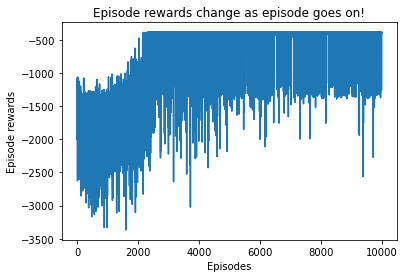

In [7]:
def showDiagam(x, y):
    plt.figure()
    x = list(range(x))

    plt.plot(x, y)
    plt.xlabel("Episodes") # 
    plt.ylabel("Episode rewards") # Average reward per thousand episodes
    plt.title("Episode rewards change as episode goes on!")
    print("saving learning curve...")
    plt.show()

path='diagrams/'
showDiagam(num_iterations, rewards_all_episodes)

In [8]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_iterations / 1000)
count = 1000

rewards_temp = []

for r in rewards_per_thousand_episodes:
    average = sum(r / 1000)
    rewards_temp.append(average)
    print(count, ": ", str(sum(r / 1000)))
    count += 1000

1000 :  -1870.5179999999996
2000 :  -1664.7730000000029
3000 :  -870.8490000000157
4000 :  -498.99699999999365
5000 :  -494.3709999999936
6000 :  -467.8499999999933
7000 :  -456.6439999999934
8000 :  -454.939999999994
9000 :  -450.42399999999407
10000 :  -452.47899999999345


100 :  -1741.0800000000004
200 :  -1997.5999999999995
300 :  -2008.4799999999993
400 :  -1972.0499999999997
500 :  -1929.8799999999994
600 :  -1896.9499999999996
700 :  -1828.16
800 :  -1786.54
900 :  -1766.7999999999993
1000 :  -1777.6400000000012
1100 :  -1721.0899999999992
1200 :  -1738.1400000000003
1300 :  -1670.7199999999996
1400 :  -1705.02
1500 :  -1673.1899999999991
1600 :  -1692.5999999999997
1700 :  -1631.3600000000001
1800 :  -1598.9700000000005
1900 :  -1620.0
2000 :  -1596.6399999999996
2100 :  -1547.8999999999999
2200 :  -1462.6700000000005
2300 :  -1404.2500000000002
2400 :  -1088.98
2500 :  -532.8799999999997
2600 :  -571.1399999999998
2700 :  -529.2199999999997
2800 :  -531.6399999999996
2900 :  -523.2699999999996
3000 :  -516.5399999999998
3100 :  -493.3699999999997
3200 :  -431.7799999999997
3300 :  -473.57999999999976
3400 :  -492.2799999999997
3500 :  -533.8199999999997
3600 :  -482.7999999999997
3700 :  -490.21999999999974
3800 :  -533.6899999999996
3900 :  -572.

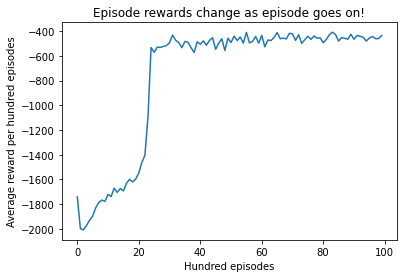

In [9]:
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes), num_iterations / 100)
count = 100

rewards_temp = []

for r in rewards_per_hundred_episodes:
    average = sum(r / 100)
    rewards_temp.append(average)
    print(count, ": ", str(sum(r / 100)))
    count += 100

    
plt.figure()
x = list(range(int(num_iterations / 100)))
y = rewards_temp

plt.plot(x, y)
plt.xlabel("Hundred episodes") # 
plt.ylabel("Average reward per hundred episodes") # Average reward per thousand episodes
plt.title("Episode rewards change as episode goes on!")
print("saving learning curve...")
plt.show()

# showDiagam(int(num_iterations / 1000), rewards_temp)

In [10]:
print(agent.Q)

defaultdict(<function QAgent.__init__.<locals>.<lambda> at 0x7fcdc95a8af0>, {((5, 0), (4, 1)): array([-347.94465568, -347.34763073, -347.34771404, -335.70476858]), ((4, 0), (4, 1)): array([-340.697218  , -341.65811289, -342.64564731, -337.51317166]), ((3, 0), (4, 1)): array([-342.72335766, -338.25053604, -338.36850858, -338.42206501]), ((2, 0), (4, 1)): array([-337.05052174, -340.25039088, -342.15288371, -340.73773552]), ((1, 0), (4, 1)): array([-336.24219237, -340.62532174, -340.60920527, -334.32097121]), ((0, 0), (4, 1)): array([-334.38866325, -340.49329609, -334.38866325, -336.47515322]), ((5, 1), (4, 1)): array([-324.9543117 , -335.70465619, -347.3446793 , -347.3476322 ]), ((4, 1), (3, 1)): array([-313.08516333, -337.69028883, -337.43288726, -337.7021981 ]), ((3, 1), (2, 1)): array([-300.08602357, -326.95348594, -326.9536882 , -326.95197249]), ((2, 1), (1, 1)): array([-300.08602332, -315.06632361, -285.94547835, -315.08515875]), ((3, 1), (1, 1)): array([-300.08432322, -301.53228893

In [12]:
# saveDict={"用户1":"密码1"，"用户2":"密码2"}
import csv
fileName="V_table.csv"
##保存文件
with open("V_table.csv","w") as csv_file:
    writer=csv.writer(csv_file)
    
    for key,value in agent.Q.items():
        writer.writerow([key,value])


# with open(fileName,"w",newline='') as csvfile:
#     fieldnames = ['state', 'actions']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for key,value in agent.Q.items():
#         writer.writerow([key,value])
        
        
# ##读取文件
# readDict={}
# with open(fileName,"rb") as csv_file:
#     reader=csv.reader(csv_file):
#     readDict=dict(reader)

In [85]:
##读取文件
import csv
# readDict={}
fileName="V table.csv"
# with open(fileName,"rb") as csv_file:
#     reader=csv.reader(csv_file)
#     readDict=dict(reader)
# print(readDict)

with open(fileName, mode='r') as infile:
    reader = csv.reader(infile)
    mydict = {rows[0]:rows[1] for rows in reader}
# print(mydict)
print(mydict[str(((5, 0), (4, 1)))])

[-338.25741526 -346.6476998  -345.48349237 -335.70476858]


In [92]:
V_table = defaultdict(lambda: np.zeros(len(self.action_space)))
print(V_table)
V_table = mydict
# print(V_table)

# print(V_table)
print(V_table[str(((5,0),(4,2)))])
print(np.argmax(agent.Q[(5,0),(4,3)])) # 0-3

# agent.Q = mydict

defaultdict(<function <lambda> at 0x7f81a14915e0>, {})
[-318.05850255 -314.84254118 -314.84254118 -317.29075969]
0


In [49]:
print(np.argmax(agent.Q[(5,0),(4,3)])) # 0-3
print(agent.Q[(5,0),(4,2)])

0
[-320.52518966 -320.76832847 -319.82311234 -320.12444681]


In [ ]:
*************************************************************************
 *
 * Map struct ->  BoxPushing grid-world game
 *          ┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┐
 *          │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │1 0│1 1│1 2│1 3│
 *      ┌───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
 *      │ 0 │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
 *      ├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
 *      │ 1 │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
 *      ├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
 *      │ 2 │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
 *      ├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
 *      │ 3 │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
 *      ├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
 *      │ 4 │   │ B │   │▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│ G │   │
 *      ├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
 *      │ 5 │ A │   │▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│▓▓▓│   │
 *      └───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┘
 *      A->Agent, B->Box, G->Goal, ▓▓▓->Cliff
 * 
    
#Load the map of lava
lava_loc = []
for i in range(2, 13):
    lava_loc.append((5, i))
for i in range(3, 12):
    lava_loc.append((4, i))



In [16]:
import collections
"""
        Agent has an obervation of 3x3.
             _______________________________________________________
         ___|_0_|_1_|_2_|_3_|_4_|_5_|_6_|_7_|_8_|_9_|_10|_11|_12|_13|
        |_0_|___|___|___|___|___|___|_x_|___|___|_x_|___|___|___|___|
        |_1_|___|___|___|___|___|___|_x_|___|___|_x_|___|___|___|___|
        |_2_|___|___|___|_x_|___|___|_x_|___|___|_x_|___|___|_x_|___|
        |_3_|___|___|___|_x_|___|___|_x_|___|___|___|___|___|_x_|___|
        |_4_|___|_B_|___|_x_|___|___|___|___|___|_x_|___|___|_x_|_G_|
        |_5_|_A_|___|___|_x_|___|___|___|___|___|_x_|___|___|_x_|___|
"""

DEFAULT_DANGER_REGION = collections.OrderedDict({
    'A': [(2, 3), (5, 3)],
    'B': [(0, 6), (3, 6)],
    'C': [(0, 9), (2, 9)],
    'D': [(4, 9), (5, 9)],
    'E': [(2, 12), (5, 12)],
})

lava_loc = []
for _, region in DEFAULT_DANGER_REGION.items():
    A, B = region
    assert A[1] == B[1], "A[1] != B[1]"
    for i in range(A[0], B[0]+1):
        lava_loc.append((i, A[1]))

print(lava_loc)


[(2, 3), (3, 3), (4, 3), (5, 3), (0, 6), (1, 6), (2, 6), (3, 6), (0, 9), (1, 9), (2, 9), (4, 9), (5, 9), (2, 12), (3, 12), (4, 12), (5, 12)]


In [17]:

def DrawAboveLine():
    print('    ┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┐')
    print('    │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │1 0│1 1│1 2│1 3│')
    print('┌───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤')


def DrawMiddleLine():
    print('├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤')


def DrawBelowLine():
    print('└───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┘')


def GetActionArrow(Q, raw, col, box_loc):
    '''
    Function for extract the max Q-value in a specific Q-table location
    Then show the action with the arrow representation

    Parameters
    ----------
    Q : this is the Q-table we use
    raw, col : these are the target agent block location, the index in Q-table
    box_loc : this is the box location, which is also the index in Q-table

    Returns
    -------
    arr : str
        the arrow showing the action in Q-table

    '''
    state = ((raw, col), box_loc)
    if Q[state].any() == 0:
        arr = ' '
    else:
        arrows = ['↑', '↓', '←', '→']
        arr = arrows[np.argmax(Q[state])]
    return arr


def DrawBlock(Q, raw, col, agent_loc, box_loc, goal_loc):
    '''
    Function for draw the specific block in the map
    Use A->Agent, B->Box, G->Goal, ▓▓▓->Lava, and Arrows for Q value-actions.
     
    Parameters
    ----------
     Q : this is the Q-table we use
     raw, col : these are the target block location
     agent_loc, box_loc, goal_loc - these are the map data
    '''
    if agent_loc == (raw, col):
        print(' A │', end='')
    elif box_loc == (raw, col):
        print(' B │', end='')
    elif goal_loc == (raw, col):
        print(' G │', end='')
    elif (raw, col) in lava_loc:
        print('▓▓▓│', end='')
    else:
        arr = GetActionArrow(Q, raw, col, box_loc)
        print(' ' + arr + ' │', end='')


def DrawEmptyBlock(raw, col, agent_loc, box_loc, goal_loc):
    '''
    The another version of function for draw the specific block in the map
    Use A->Agent, B->Box, G->Goal, ▓▓▓->Lava, 
    Here, we don't fill the block with arrows but leave them empty.
    '''
    if agent_loc == (raw, col):
        print(' A │', end='')
    elif box_loc == (raw, col):
        print(' B │', end='')
    elif goal_loc == (raw, col):
        print(' G │', end='')
    elif (raw, col) in lava_loc:
        print('▓▓▓│', end='')
    else:
        print('   │', end='')


def DrawMap(Q, agent_loc, box_loc, goal_loc):
    '''
    Function for draw the whole map with the states currently.
    Use A->Agent, B->Box, G->Goal, ▓▓▓->Lava, and Arrows for Q value-actions.
     
    Parameters
    ----------
     Q : this is the Q-table we use
     agent_loc, box_loc, goal_loc : these are the map data
    '''
    DrawAboveLine()
    for raw in range(6):
        print('│ ' + str(raw) + ' │', end='')
        for col in range(14):
            DrawBlock(Q, raw, col, agent_loc, box_loc, goal_loc)
            if col == 13:
                print('')
        if raw == 5:
            DrawBelowLine()
        else:
            DrawMiddleLine()
    action_cur = GetActionArrow(Q, agent_loc[0], agent_loc[1], box_loc)
    print('Agent Action Now: ' + action_cur)

def DrawEmptyMap(agent_loc, box_loc, goal_loc):
    '''
    The another version of function for draw the whole map
    Use A->Agent, B->Box, G->Goal, ▓▓▓->Lava, 
    Here, we don't fill the block with arrows but leave them empty.
    '''
    DrawAboveLine()
    for raw in range(6):
        print('│ ' + str(raw) + ' │', end='')
        for col in range(14):
            DrawEmptyBlock(raw, col, agent_loc, box_loc, goal_loc)
            if col == 13:
                print('')
        if raw == 5:
            DrawBelowLine()
        else:
            DrawMiddleLine()

In [29]:
#Draw the map of the game with Q-value showing
DrawMap(agent.Q, (3, 1), (2, 1), (4,13))
# DrawMap(agent.Q, (1,11), (2,12), (4,12))

    ┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┐
    │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │1 0│1 1│1 2│1 3│
┌───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │ → │ ↓ │ → │ → │ ↑ │ ↓ │▓▓▓│ → │ ↑ │▓▓▓│ ↑ │ ↑ │ ← │ ↑ │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 1 │ ← │ → │ ← │ ← │ ↓ │ ↓ │▓▓▓│ ↑ │ ↑ │▓▓▓│ → │ ↓ │ → │ ↓ │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ → │ B │ ↓ │▓▓▓│ → │ ↓ │▓▓▓│ → │ ← │▓▓▓│ → │ ← │▓▓▓│ → │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 3 │ → │ A │ ← │▓▓▓│ ↓ │ ↓ │▓▓▓│ → │ ↑ │ → │ ↑ │ ↓ │▓▓▓│ ↓ │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 4 │ ↑ │ ↑ │ ← │▓▓▓│ ↓ │ ← │ ↓ │ ↓ │ ↑ │▓▓▓│ ↓ │ ↓ │▓▓▓│ G │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 5 │ ↑ │ ↑ │ ← │▓▓▓│ ↑ │ ← │ → │ ↓ │ ↑ │▓▓▓│ ↓ │ ↓ │▓▓▓│ ↓ │
└───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┘
Agent Action Now: ↑


In [35]:
from IPython.display import clear_output
# print(agent.Q)

goal_pos=(4, 13)
teminated = False
rewards = []
time_step = 0
for episode in range(3):
    env.reset()
    print("*****EPISODE ", episode + 1, "*****\n\n\n\n")
    time.sleep(1)
    
    while not teminated:
        clear_output(wait=True)        
#         env.render()
        (agent_pos, box_pos) = env.get_state()
        DrawMap(agent.Q, agent_pos, box_pos, goal_pos)
        time.sleep(0.3)
        
        state = env.get_state()
        action = agent.take_action(state)
        reward, teminated, _ = env.step([action])
        rewards.append(reward)
        time_step += 1
        
    clear_output(wait=True)
#     env.render()
    (agent_pos, box_pos) = env.get_state()
    DrawMap(agent.Q, agent_pos, box_pos, goal_pos)
    teminated = False
#     print(f'step: {time_step-1}, actions: {action}, reward: {reward}')
#     print(f'rewards: {sum(rewards)}')
#     print(f'print the historical actions: {env.episode_actions}')
#     time.sleep(3)
#     if sum(rewards) > -500:
#         print("****You reached the goal!****")
#         print(f'step: {time_step-1}, actions: {action}, reward: {reward}')
#         print(f'rewards: {sum(rewards)}')
#         print(f'print the historical actions: {env.episode_actions}')
#         time.sleep(3)
#     else:
#         print("****You fell through a hole!****")
    time.sleep(3)
    clear_output(wait=True)

#     env.close()

    ┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬───┐
    │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │1 0│1 1│1 2│1 3│
┌───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 0 │   │   │   │   │   │   │▓▓▓│   │   │▓▓▓│   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 1 │   │   │   │   │   │   │▓▓▓│   │   │▓▓▓│   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │   │   │   │▓▓▓│   │   │▓▓▓│   │   │▓▓▓│   │   │▓▓▓│   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 3 │   │   │   │▓▓▓│   │   │▓▓▓│   │   │   │   │   │▓▓▓│ A │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 4 │   │   │   │▓▓▓│   │   │   │   │   │▓▓▓│   │   │▓▓▓│ B │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 5 │   │   │   │▓▓▓│   │   │   │   │   │▓▓▓│   │   │▓▓▓│   │
└───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴───┘
Agent Action Now:  
